In [178]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [179]:
from linearRegression import LinearRegression

In [180]:
df = pd.read_csv('concrete.csv')
df = df.sample(frac=1, random_state=np.random.randint(0,100)).reset_index(drop=True)
display(df)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
1,122.6,183.9,0.0,203.5,0.0,958.2,800.1,3,3.32
2,491.0,26.0,123.0,201.0,3.9,822.0,699.0,28,57.92
3,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,100,40.39
4,304.0,140.0,0.0,214.0,6.0,895.0,722.0,28,33.42
...,...,...,...,...,...,...,...,...,...
1025,342.0,38.0,0.0,228.0,0.0,932.0,670.0,90,50.46
1026,387.0,20.0,94.0,157.0,11.6,938.0,845.0,3,34.77
1027,212.5,0.0,100.4,159.3,8.7,1007.8,903.6,28,31.64
1028,349.0,0.0,0.0,192.0,0.0,1056.0,809.0,28,33.61


In [181]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [182]:
print(X)
print(y)

[[ 239.6  359.4    0.  ...  941.6  664.3   28. ]
 [ 122.6  183.9    0.  ...  958.2  800.1    3. ]
 [ 491.    26.   123.  ...  822.   699.    28. ]
 ...
 [ 212.5    0.   100.4 ... 1007.8  903.6   28. ]
 [ 349.     0.     0.  ... 1056.   809.    28. ]
 [ 359.    19.   141.  ...  942.   801.     7. ]]
[39.44  3.32 57.92 ... 31.64 33.61 35.75]


In [183]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std
# print(X_normalized)

y = np.array(y)

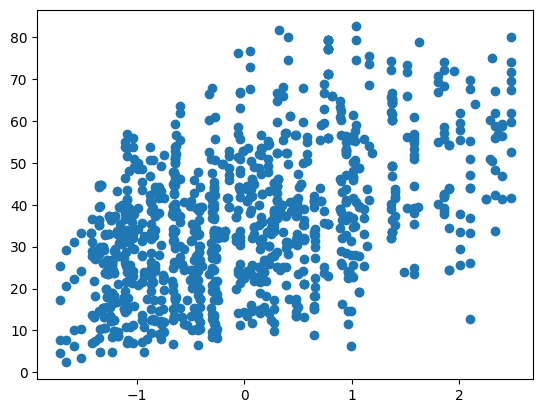

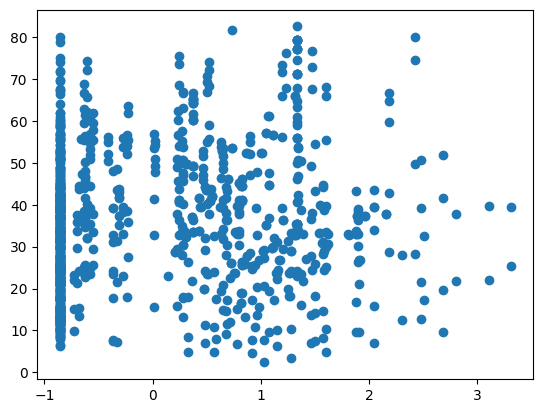

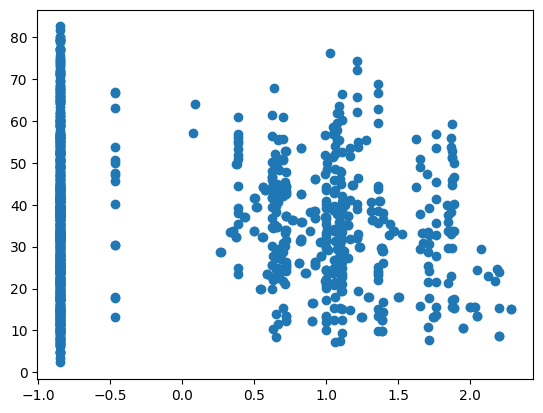

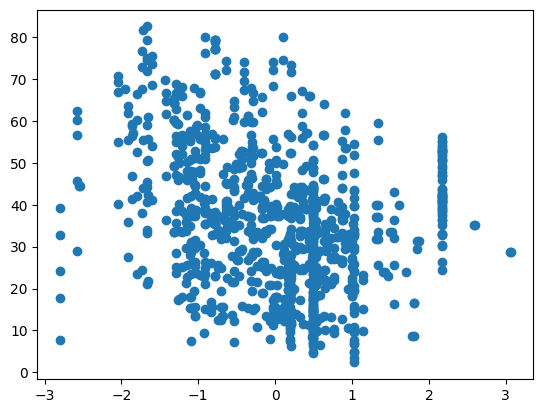

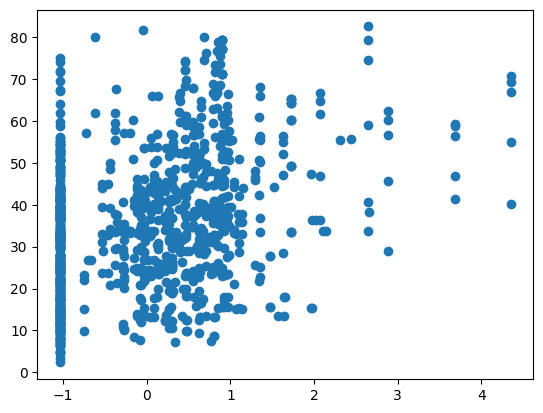

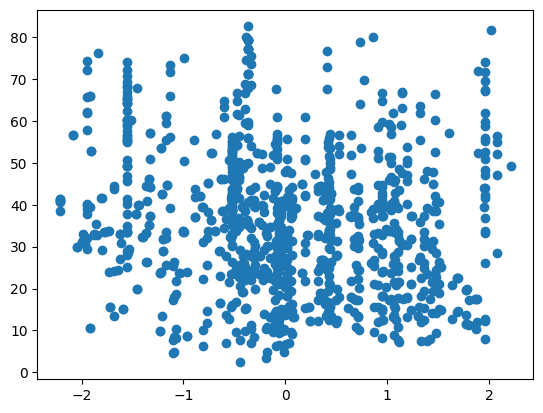

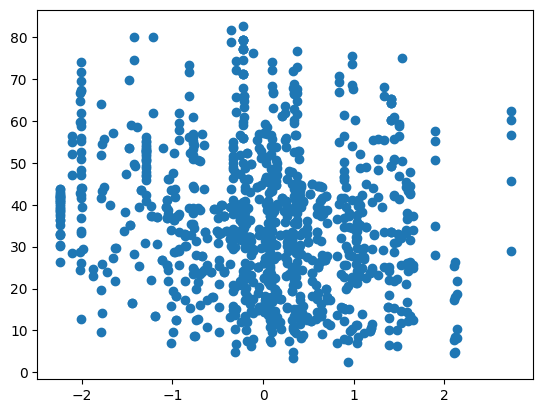

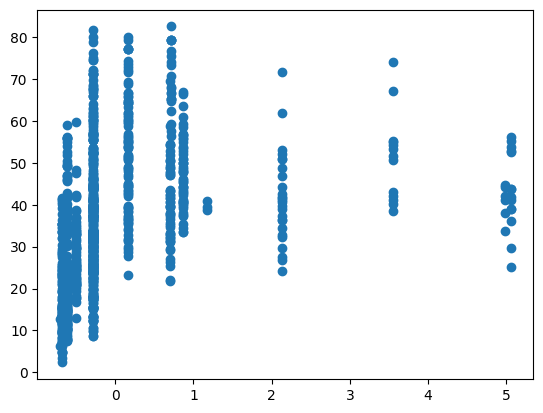

In [191]:
for i in range(X.shape[1]):
    plt.scatter(X_normalized[:, i],y)
    plt.show()

In [203]:
n_train = y.shape[0] * 29 // 30
print(n_train)

X_train = X_normalized[0:n_train]
X_test = X_normalized[n_train:]

y_train = y[0:n_train]
y_test = y[n_train:]

995


In [204]:
iterations = 500
lr = 0.01
rp = 0.1

model = LinearRegression(lr,iterations,rp)
model.fit(X_train,y_train)
print(model.w, model.b)
y_predict = [model.predict(i) for i in X_test]

[ 7.33189495  3.79596865  0.73934396 -5.55724845  3.20601948 -1.59791333
 -2.54207413  6.72762001] 35.58228699179827


In [205]:
print(model.costs[-1])

111.37927614537155


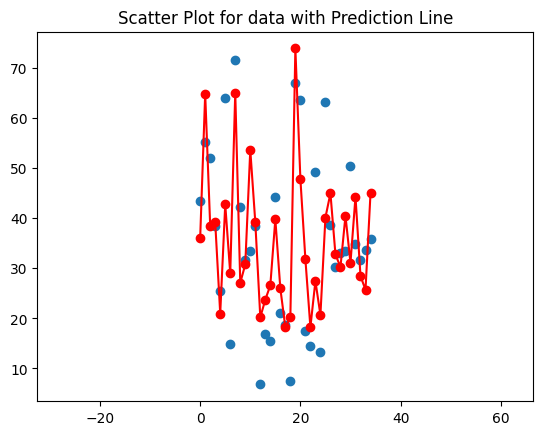

In [206]:
points = np.arange(len(y_test))
plt.scatter(points, y_test, label='Actual Data')
plt.plot(points, y_predict, color='red', label='Predicted Line', marker='o')
plt.axis('equal')
plt.title('Scatter Plot for data with Prediction Line')
plt.show()

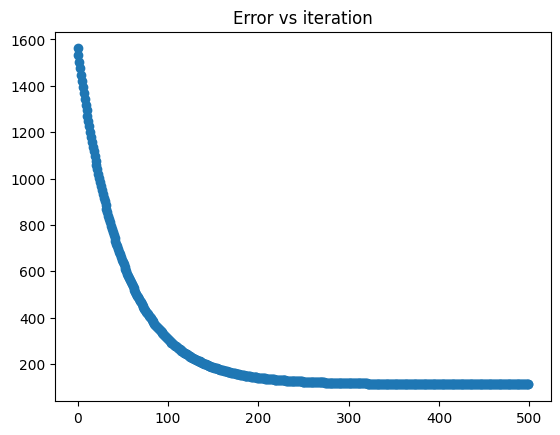

In [207]:
iterList = [i for i in range(len(model.costs))]
plt.scatter(iterList, model.costs, label='Actual Data')
plt.title('Error vs iteration')
plt.show()